In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 20news-bydate.tar.gz to 20news-bydate.tar.gz


In [ ]:
import os
import tarfile

os.makedirs('20news-bydate', exist_ok=True)

with tarfile.open('20news-bydate.tar.gz', 'r') as tar_ref:
    tar_ref.extractall('20news-bydate')

In [ ]:
import pandas as pd

train_data_dir = '20news-bydate/20news-bydate-train'
test_data_dir = '20news-bydate/20news-bydate-test'

# Function to load data
def load_20newsgroups(data_dir):
    data = []
    target = []

    for newsgroup in os.listdir(data_dir):
        newsgroup_path = os.path.join(data_dir, newsgroup)

        if os.path.isdir(newsgroup_path):
            for filename in os.listdir(newsgroup_path):
                file_path = os.path.join(newsgroup_path, filename)

                if os.path.isfile(file_path):
                    with open(file_path, 'r', encoding='latin1') as file:
                        content = file.read()
                        data.append(content)
                        target.append(newsgroup)

    return pd.DataFrame({'text': data, 'newsgroup': target})

train_df = load_20newsgroups(train_data_dir)
test_df = load_20newsgroups(test_data_dir)

In [ ]:
train_df.head()

,text,newsgroup
0,From: pkortela@snakemail.hut.fi (Petteri Korte...,rec.sport.hockey
1,From: mmb@lamar.ColoState.EDU (Michael Burger)...,rec.sport.hockey
2,From: umturne4@ccu.umanitoba.ca (Daryl Turner)...,rec.sport.hockey
3,From: smale@healthy.uwaterloo.ca (Bryan Smale)...,rec.sport.hockey
4,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,rec.sport.hockey


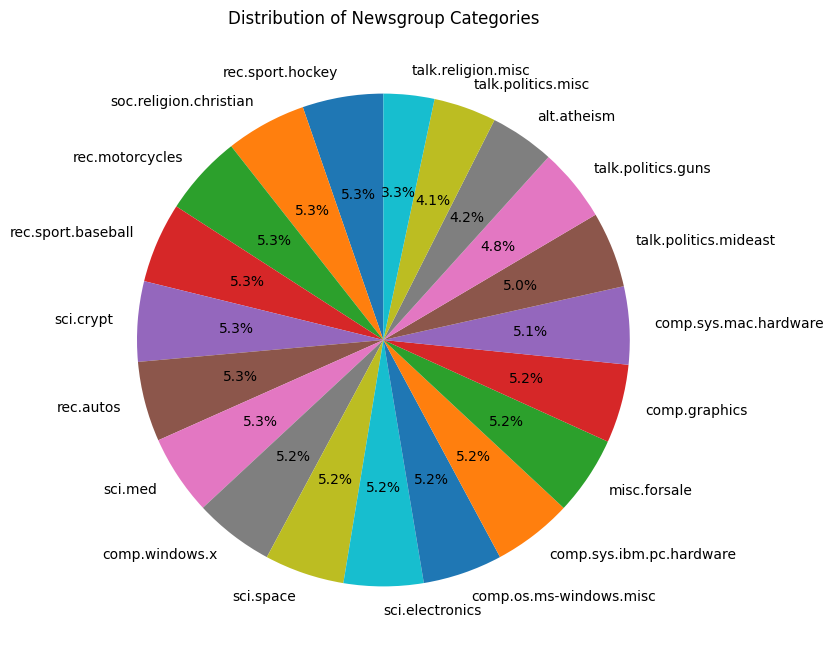

In [ ]:
import matplotlib.pyplot as plt

newsgroup_counts = train_df['newsgroup'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(newsgroup_counts, labels=newsgroup_counts.index, autopct='%1.1f%%', startangle=90)
_ = plt.title('Distribution of Newsgroup Categories')

In [ ]:
import torch
!pip install NeuralNMF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(train_df['text'])

In [ ]:
X = torch.tensor(tfidf.toarray(), dtype=torch.float64)
X.shape

torch.Size([11314, 56123])

In [ ]:
from NeuralNMF import Neural_NMF

# m = 100
# k1 = 10
# k2 = 5

# net = Neural_NMF([m, k1, k2])


In [ ]:
from NeuralNMF import train

# Train the model
# history = train(net, X[:100], epoch=6, lr=500, supervised=False)


In [ ]:
X1 = X[0:11300]
m = 100
k1 = 10
k2 = 5

net = Neural_NMF([m, k1, k2])


def create_batches(X1, batch_size):
    num_samples = 11300
    indices = torch.randperm(num_samples)
    return [X1[indices[i:i + batch_size]] for i in range(0, num_samples, batch_size)]

# Create batches
batch_size = 100  # Adjust batch size as needed
batches = create_batches(X1, batch_size)

history = []

# Function to train on batches
def train_on_batches(net, batches, epochs, lr):
    for batch in batches:
        history1 = train(net, batch, epoch=epochs, lr=lr, supervised=False)
        history.append(history1)


# Train the model on batches
train_on_batches(net, batches, epochs=6, lr=500)



torch.Size([11300, 56123])